In [67]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.transform import radon
from skimage.data import binary_blobs
from skimage.draw import disk

In [86]:
def getK(nx,theta):
    nd = int(np.sqrt(2)*nx)+1
    nt = len(theta)
    N = nx**2
    M = nd*nt
    K = np.zeros((M,N))
    for i in range(nx**2):
        ei = np.zeros(nx**2)
        ei[i] = 1
        K[:,i] = radon(np.reshape(ei,(nx,nx)), theta=theta, circle = False).ravel()
    return K

def getPhantom(nx, r = 0.9):
    # mask
    mask = np.zeros((nx,nx))
    ii,jj = disk((nx//2,nx//2),r * (nx//2))
    mask[ii,jj] = 1
    
    # binary blobs
    u = 0.5 * np.float64(binary_blobs(length=nx, blob_size_fraction=0.5))
    u += 0.5 * np.float64(binary_blobs(length=nx, blob_size_fraction=0.2))
    u *= mask
    
    # return
    return u.ravel()
    
def plot_image(u,nx):
    
    plt.imshow(u.reshape((nx,nx)))

def plot_sinogram(f,nt):
    nd = len(f) // nt
    plt.imshow(f.reshape((nd,nt)))

In [93]:
nx = 32
nt = 32
theta = np.linspace(0,180,nt)
K = getK(nx,theta)
u = getPhantom(nx)
f = K@u

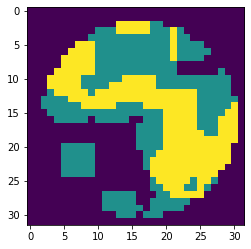

In [94]:
plot_image(u,nx)

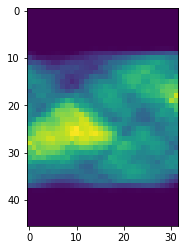

In [95]:
plot_sinogram(f,nt)

In [96]:
K.shape

(1472, 1024)